In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import itertools
from sklearn.metrics import  mean_squared_error
import statsmodels.api as sm
from sklearn import metrics
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 8]
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df1 = pd.read_csv("Rose.csv")

In [3]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')

In [4]:
df1['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])

In [5]:
data = df1.set_index('Time_Stamp')

In [8]:
data.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [9]:
data.tail()

,YearMonth,Rose
Time_Stamp,,
1995-03-31,1995-03,45.0
1995-04-30,1995-04,52.0
1995-05-31,1995-05,28.0
1995-06-30,1995-06,40.0
1995-07-31,1995-07,62.0


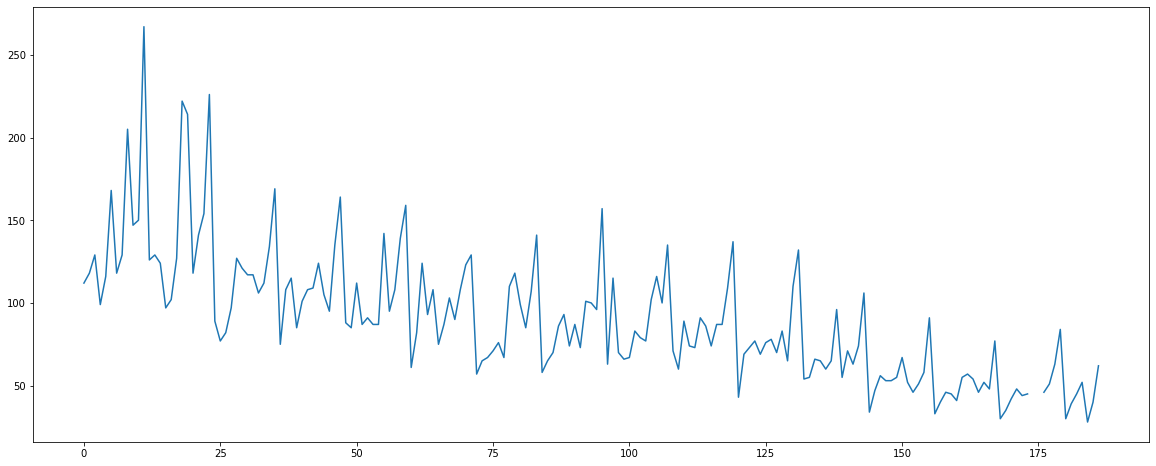

In [10]:
df1['Rose'].plot(figsize=(20,8))

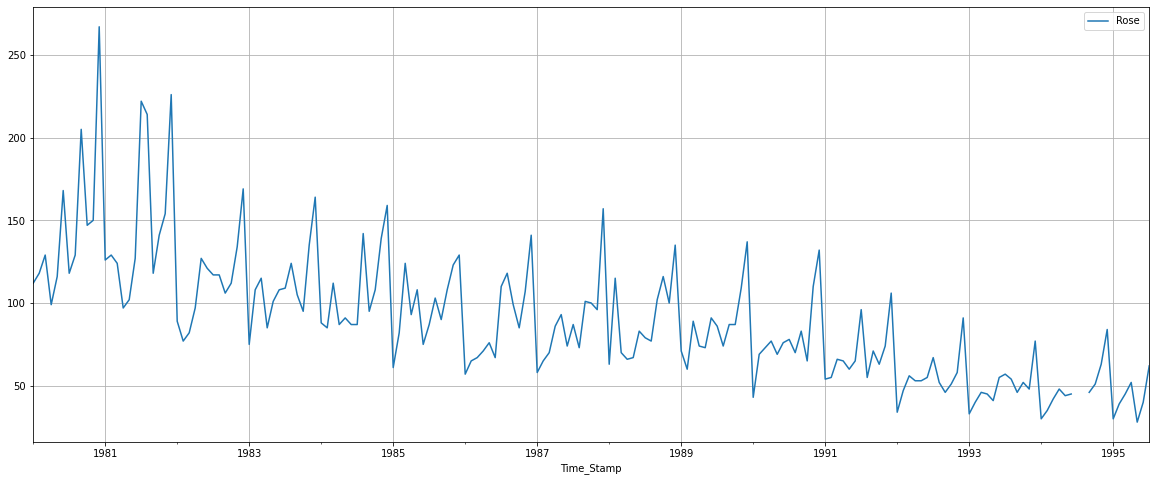

In [11]:
data.plot(figsize=(20,8))
plt.grid();

In [12]:
data.drop(['YearMonth'], axis=1, inplace=True)

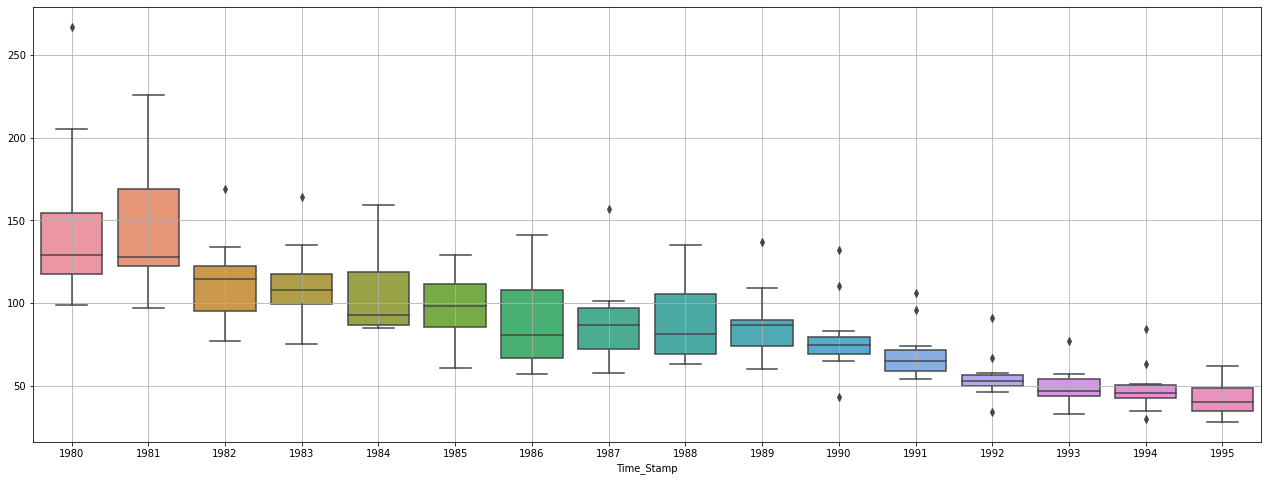

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.year,y = data.values[:,0],ax=ax)
plt.grid();

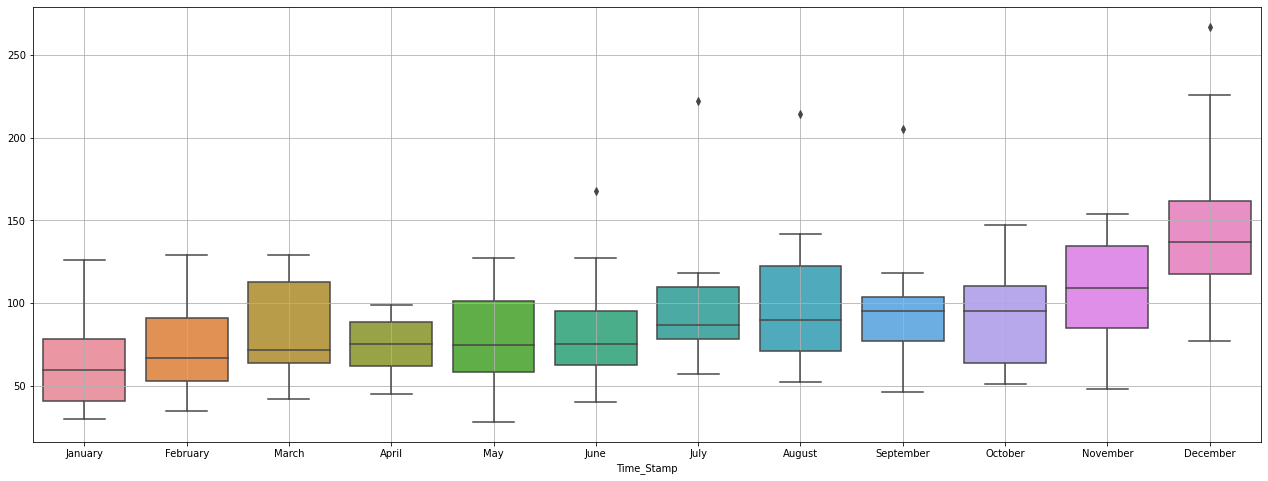

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.month_name(),y = data.values[:,0],ax=ax)
plt.grid();

In [15]:
data.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [16]:
yearly_sales_across_months = pd.pivot_table(data, values='Rose',columns = data.index.month_name(),index = data.index.year)
yearly_sales_across_months

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,99.0,129.0,267.0,118.0,112.0,118.0,168.0,129.0,116.0,150.0,147.0,205.0
1981,97.0,214.0,226.0,129.0,126.0,222.0,127.0,124.0,102.0,154.0,141.0,118.0
1982,97.0,117.0,169.0,77.0,89.0,117.0,121.0,82.0,127.0,134.0,112.0,106.0
1983,85.0,124.0,164.0,108.0,75.0,109.0,108.0,115.0,101.0,135.0,95.0,105.0
1984,87.0,142.0,159.0,85.0,88.0,87.0,87.0,112.0,91.0,139.0,108.0,95.0
1985,93.0,103.0,129.0,82.0,61.0,87.0,75.0,124.0,108.0,123.0,108.0,90.0
1986,71.0,118.0,141.0,65.0,57.0,110.0,67.0,67.0,76.0,107.0,85.0,99.0
1987,86.0,73.0,157.0,65.0,58.0,87.0,74.0,70.0,93.0,96.0,100.0,101.0
1988,66.0,77.0,135.0,115.0,63.0,79.0,83.0,70.0,67.0,100.0,116.0,102.0


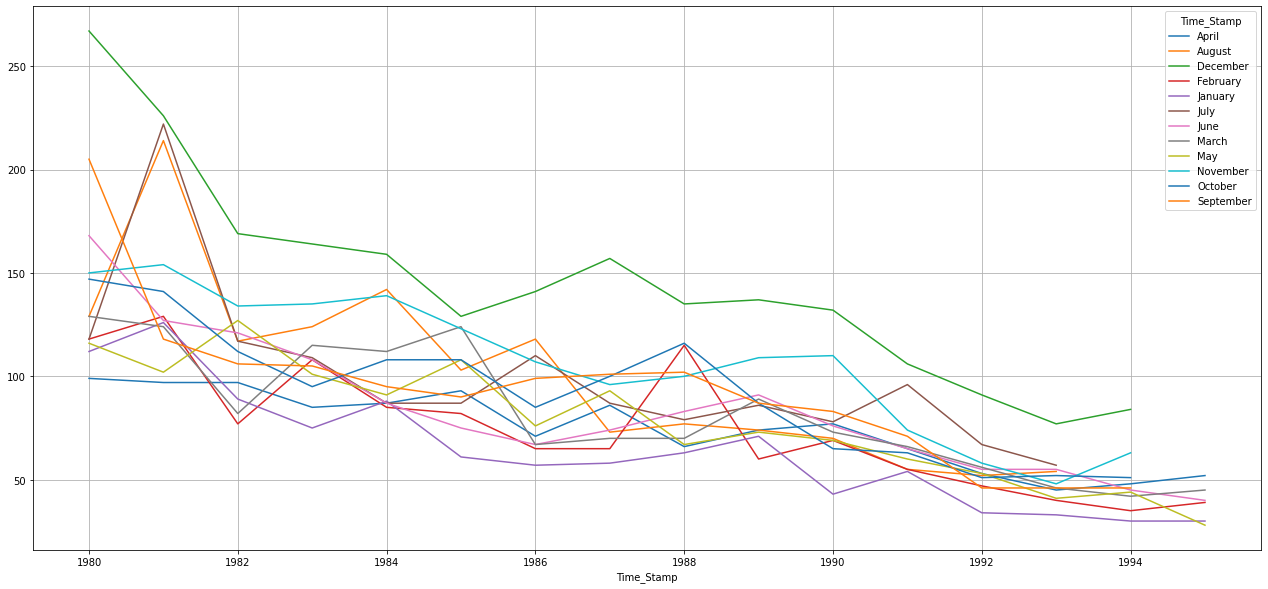

In [17]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

In [19]:
df_yearly_sum = data.resample('A').sum()
df_yearly_sum.head()

,Rose
Time_Stamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


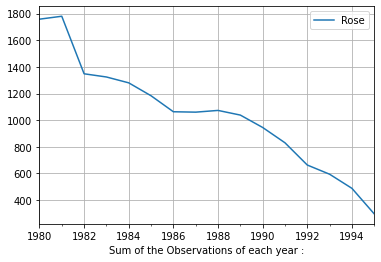

In [21]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel("Sum of the Observations of each year :");

In [22]:
df_quarterly_mean = data.resample('Q').mean()
df_quarterly_mean.head()

,Rose
Time_Stamp,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


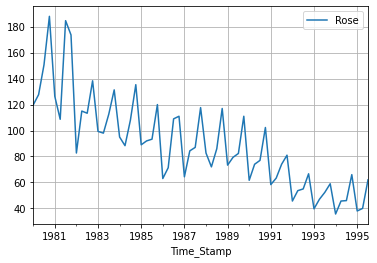

In [23]:
df_quarterly_mean.plot();
plt.grid()

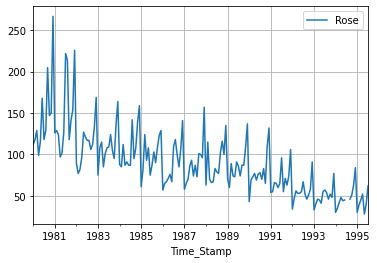

In [24]:
data.plot()
plt.grid();

In [25]:
df_daily_sum = data.resample('D').sum()
df_daily_sum

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-01,0.0
1980-02-02,0.0
1980-02-03,0.0
1980-02-04,0.0
...,...
1995-07-27,0.0
1995-07-28,0.0
1995-07-29,0.0


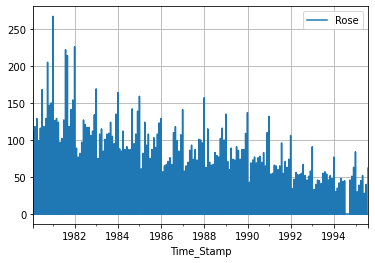

In [26]:
df_daily_sum.plot()
plt.grid();

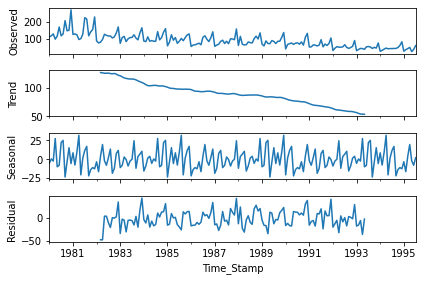

In [27]:
data.interpolate(inplace=True)
res=sm.tsa.seasonal_decompose(data,freq=52)
resplot=res.plot()

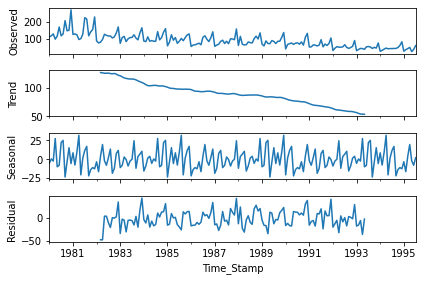

In [28]:
decomposition = seasonal_decompose(data,model='additive', freq=52)
decomposition.plot();

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [30]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
             Rose
Time_Stamp      
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
1980-06-30   NaN
1980-07-31   NaN
1980-08-31   NaN
1980-09-30   NaN
1980-10-31   NaN
1980-11-30   NaN
1980-12-31   NaN 

Seasonality 
                  Rose
Time_Stamp           
1980-01-31  -5.661140
1980-02-29   0.268347
1980-03-31  -2.603448
1980-04-30  27.640142
1980-05-31 -10.257294
1980-06-30  -8.308576
1980-07-31  22.162578
1980-08-31  25.109693
1980-09-30 -23.981653
1980-10-31  -3.750883
1980-11-30  15.316424
1980-12-31  -5.947999 

Residual 
             Rose
Time_Stamp      
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
1980-06-30   NaN
1980-07-31   NaN
1980-08-31   NaN
1980-09-30   NaN
1980-10-31   NaN
1980-11-30   NaN
1980-12-31   NaN 



In [31]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

,Rose
Time_Stamp,
1980-01-31,NaN
1980-02-29,NaN
1980-03-31,NaN
1980-04-30,NaN
1980-05-31,NaN
1980-06-30,NaN
1980-07-31,NaN
1980-08-31,NaN
1980-09-30,NaN


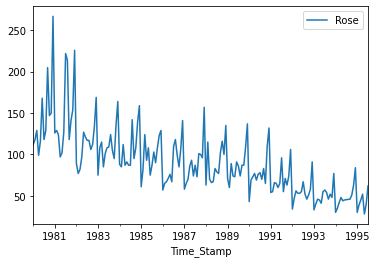

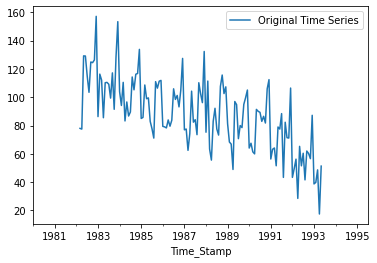

In [32]:
data.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", 
            "Time Series without Seasonality Component"]);

In [33]:
train=data[0:int(len(data)*0.7)] 
test=data[int(len(data)*0.7):]

In [34]:
print(train.shape)
print(test.shape)

(130, 1)
(57, 1)


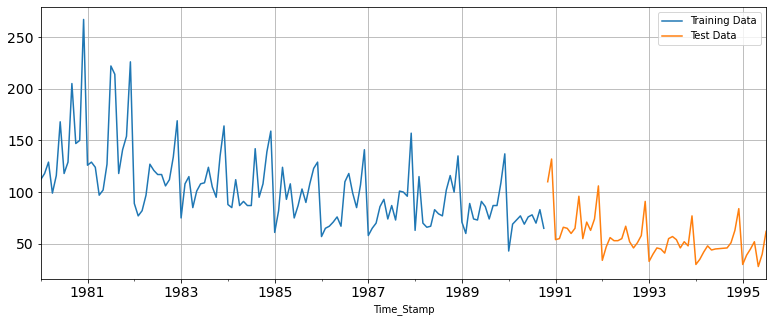

In [35]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [36]:
train_time=[i+1 for i in range(len(train))]
test_time=[i+43 for i in range(len(test))]
print("Training Time instance",'\n',train_time)
print("Test Time instance",'\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [37]:
data.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [38]:
data.tail()

,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [39]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [40]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
             Rose  time
Time_Stamp            
1990-06-30  76.0   126
1990-07-31  78.0   127
1990-08-31  70.0   128
1990-09-30  83.0   129
1990-10-31  65.0   130 

First few rows of Test Data 
              Rose  time
Time_Stamp             
1990-11-30  110.0    43
1990-12-31  132.0    44
1991-01-31   54.0    45
1991-02-28   55.0    46
1991-03-31   66.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    95
1995-04-30  52.0    96
1995-05-31  28.0    97
1995-06-30  40.0    98
1995-07-31  62.0    99 



In [41]:
lr = LinearRegression()

In [42]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
LinearRegression_test

,Rose,time,RegOnTime
Time_Stamp,,,
1990-11-30,110.000000,43,116.599066
1990-12-31,132.000000,44,116.069877
1991-01-31,54.000000,45,115.540687
1991-02-28,55.000000,46,115.011498
1991-03-31,66.000000,47,114.482309
1991-04-30,65.000000,48,113.953120
1991-05-31,60.000000,49,113.423930
1991-06-30,65.000000,50,112.894741
1991-07-31,96.000000,51,112.365552


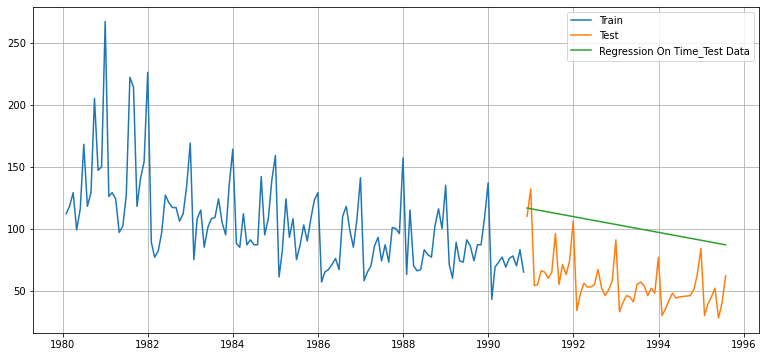

In [44]:
plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [45]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 48.754


In [46]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,48.754146


In [47]:
NaiveModel_train=train.copy()
NaiveModel_test=test.copy()

In [48]:
len(np.asarray(train['Rose']))-1

129

In [49]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1990-11-30    65.0
1990-12-31    65.0
1991-01-31    65.0
1991-02-28    65.0
1991-03-31    65.0
Name: naive, dtype: float64

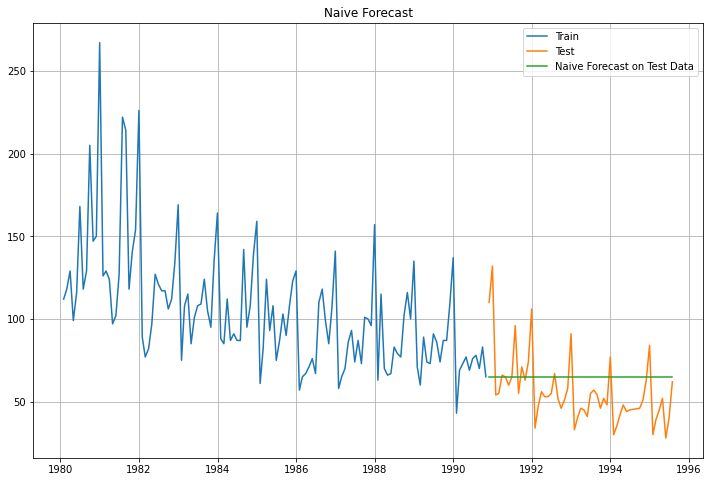

In [50]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [51]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 21.767


In [52]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,48.754146
NaiveModel,21.766930


In [53]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [55]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1990-11-30,110.0,104.692308
1990-12-31,132.0,104.692308
1991-01-31,54.0,104.692308
1991-02-28,55.0,104.692308
1991-03-31,66.0,104.692308


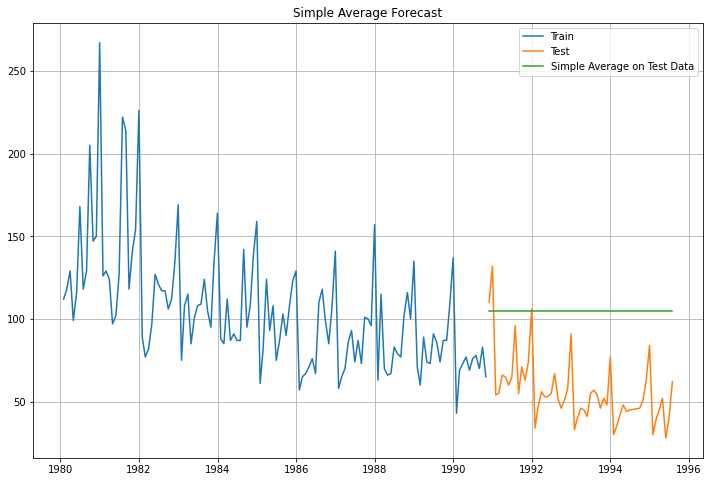

In [56]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [57]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.412


In [58]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,48.754146
NaiveModel,21.766930
SimpleAverageModel,52.412093


In [59]:
MovingAverage = data.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [60]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


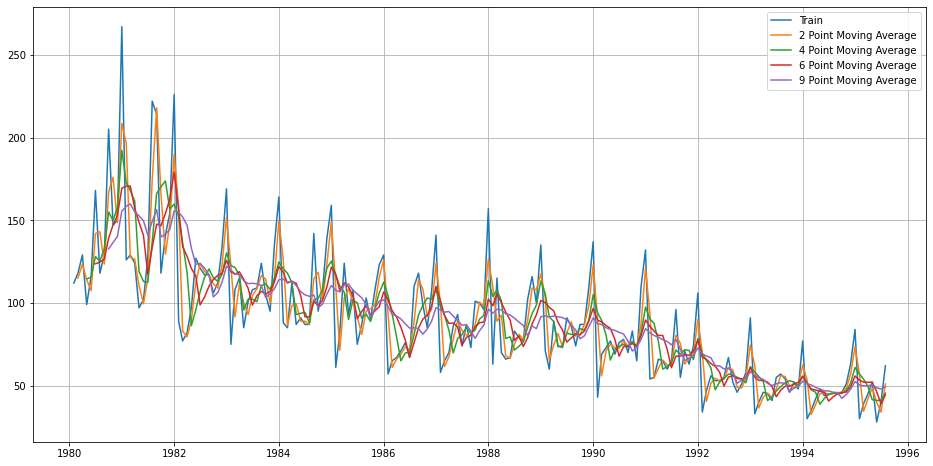

In [61]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [62]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

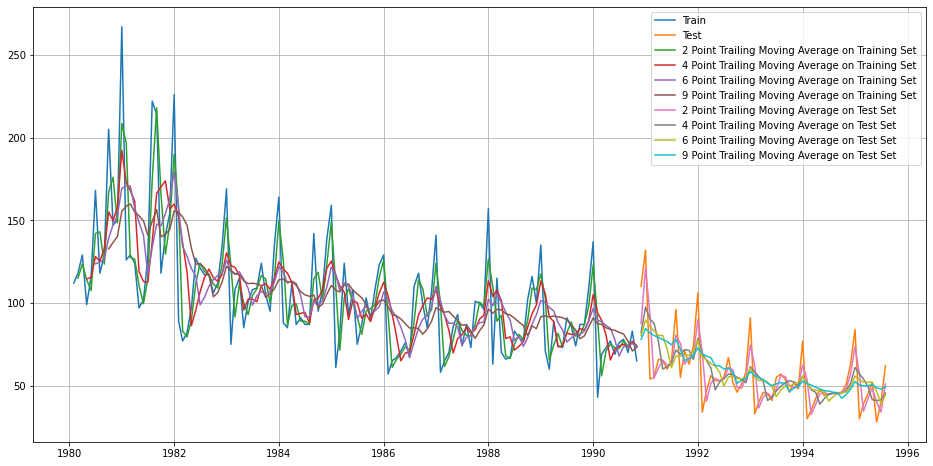

In [63]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [64]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))
rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))
rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.801
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.367
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.862
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.342 


In [65]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4,rmse_model4_test_6,rmse_model4_test_9]},index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage','6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,48.754146
NaiveModel,21.766930
SimpleAverageModel,52.412093
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919


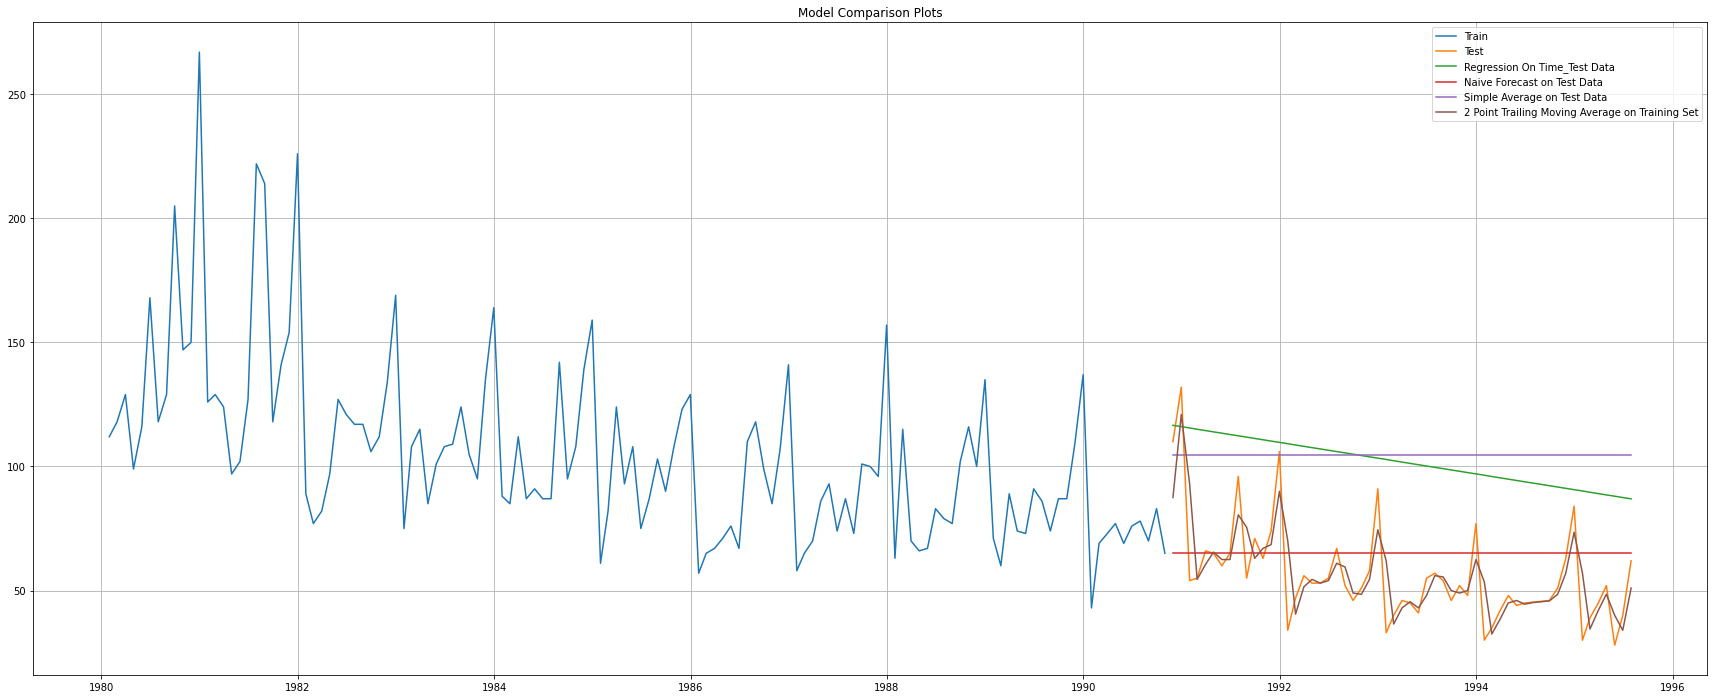

In [66]:
plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [67]:
SES_train = train.copy()
SES_test = test.copy()

In [68]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [69]:
model_SES_autofit = model_SES.fit(optimized=True)

In [70]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 134.2630157622589,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.10272108048242715,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [71]:
len(test)

57

In [72]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Rose,predict
Time_Stamp,,
1990-11-30,110.0,78.89952
1990-12-31,132.0,78.89952
1991-01-31,54.0,78.89952
1991-02-28,55.0,78.89952
1991-03-31,66.0,78.89952


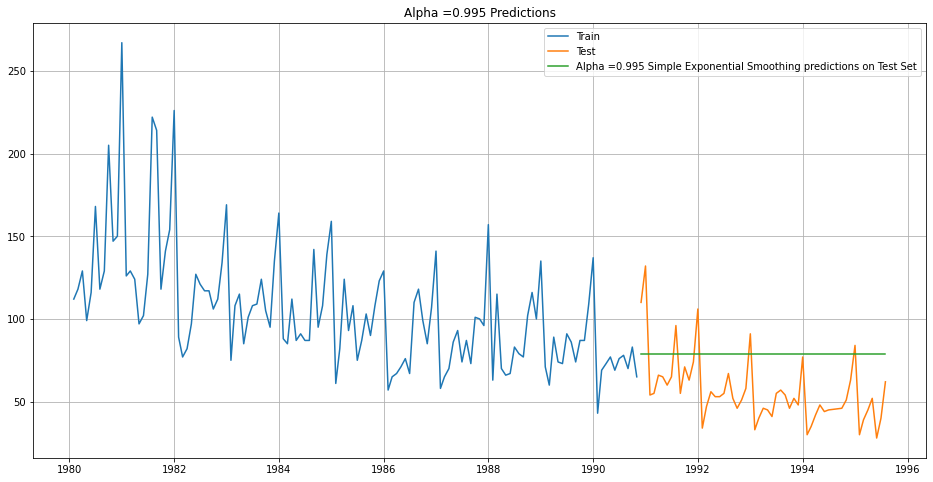

In [74]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [75]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 30.188


In [76]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,48.754146
NaiveModel,21.766930
SimpleAverageModel,52.412093
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.995,SimpleExponentialSmoothing",30.188322


In [77]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [79]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE


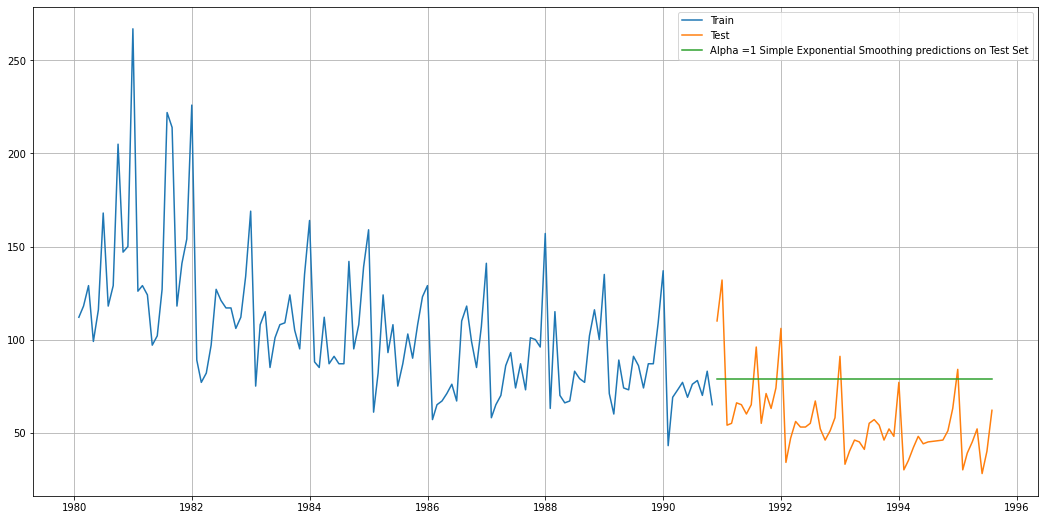

In [81]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')
#plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [82]:
DES_train = train.copy()
DES_test = test.copy()

In [83]:
model_DES = Holt(DES_train['Rose'])

In [84]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [85]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [86]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE


KeyError: ignored

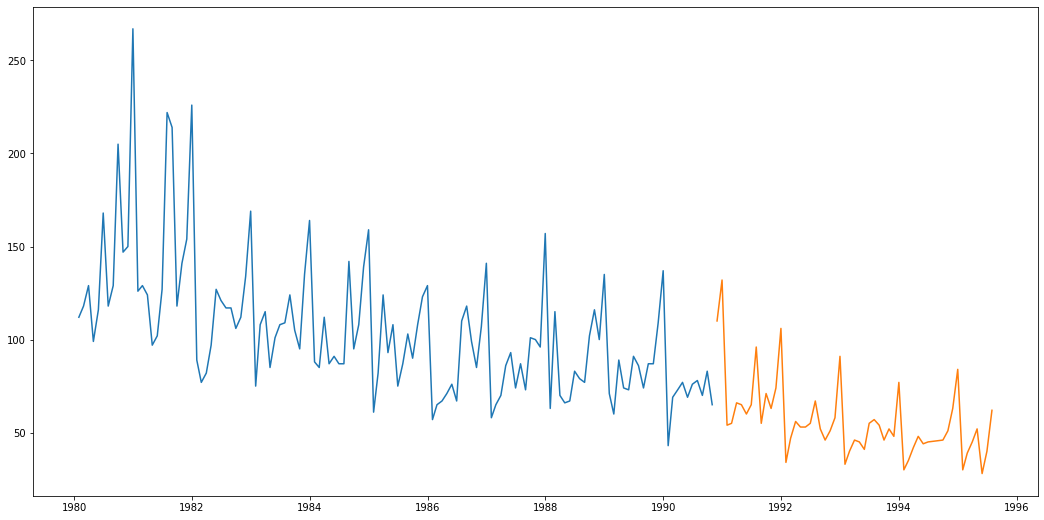

In [87]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [88]:
TES_train = train.copy()
TES_test = test.copy()

In [89]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [90]:
model_TES_autofit = model_TES.fit()

In [91]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 76.64922147538394,
 'initial_seasons': array([1.46472722, 1.64816933, 1.79482644, 1.58019728, 1.76808064,
        1.91162353, 2.10065945, 2.23734136, 2.09860816, 2.065036  ,
        2.36656732, 3.26455684]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.11717811587250355,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.03808922627817101,
 'use_boxcox': False}

In [94]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Rose,auto_predict
Time_Stamp,,
1990-11-30,110.0,89.115658
1990-12-31,132.0,122.254704
1991-01-31,54.0,54.549530
1991-02-28,55.0,61.040149
1991-03-31,66.0,66.100106


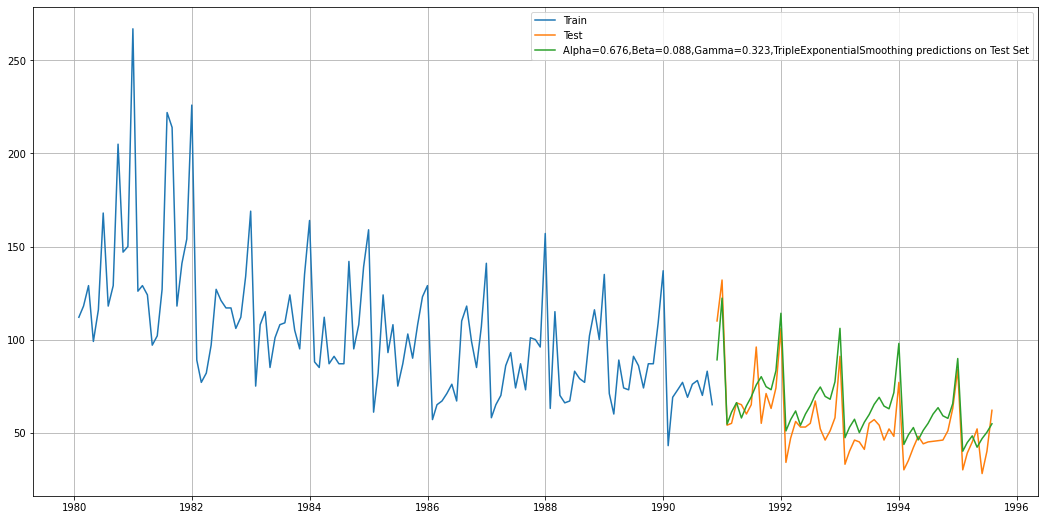

In [96]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [97]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 12.666


In [98]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE
RegressionOnTime,48.754146
NaiveModel,21.766930
SimpleAverageModel,52.412093
2pointTrailingMovingAverage,11.801043
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
"Alpha=0.995,SimpleExponentialSmoothing",30.188322
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",12.666350


In [99]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


KeyError: ignored

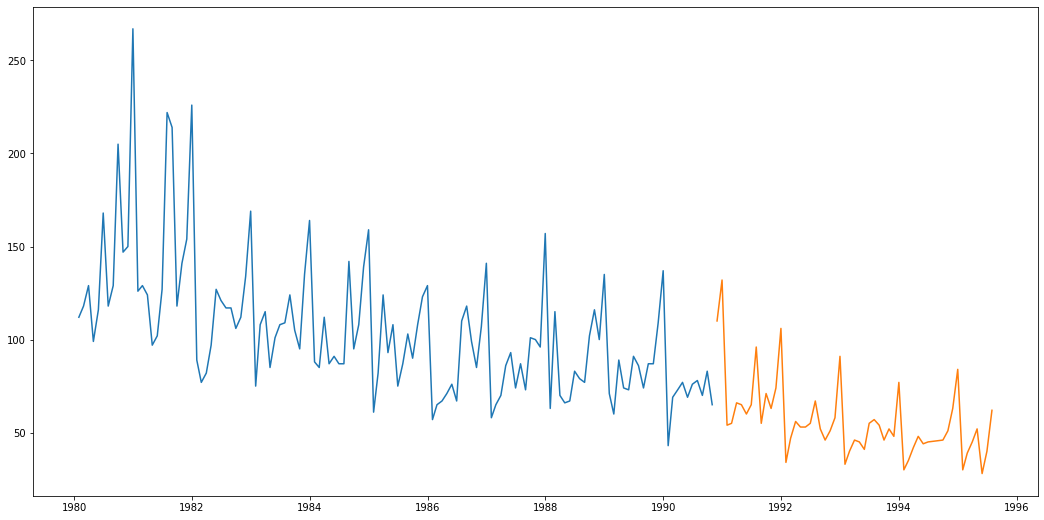

In [100]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

In [104]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
2pointTrailingMovingAverage,11.801043
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",12.666350
4pointTrailingMovingAverage,15.367212
6pointTrailingMovingAverage,15.862350
9pointTrailingMovingAverage,16.341919
NaiveModel,21.766930
"Alpha=0.995,SimpleExponentialSmoothing",30.188322
RegressionOnTime,48.754146
SimpleAverageModel,52.412093


KeyError: ignored

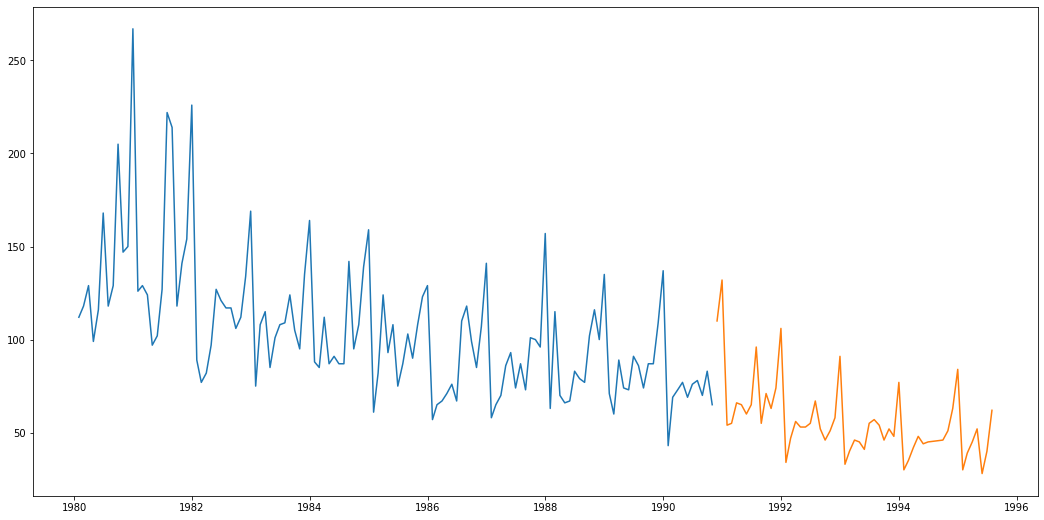

In [105]:
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [107]:
fullmodel1 = ExponentialSmoothing(data,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.676,
                                                                 smoothing_seasonal=0.323)

In [108]:
RMSE_fullmodel1 = metrics.mean_squared_error(data['Rose'],fullmodel1.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel1)

RMSE: 21.391400095574003


In [109]:
prediction_1 = fullmodel1.forecast(steps=len(test))

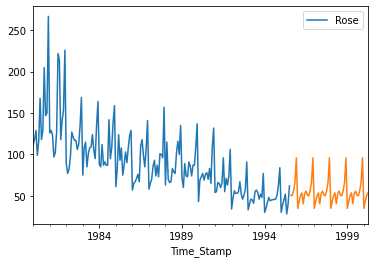

In [110]:
data.plot()
prediction_1.plot();

In [112]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,8.740506,50.719439,92.698373
1995-09-30,8.148766,50.127699,92.106633
1995-10-31,14.391781,56.370714,98.349648
1995-11-30,24.477306,66.456239,108.435173
1995-12-31,53.865719,95.844653,137.823586


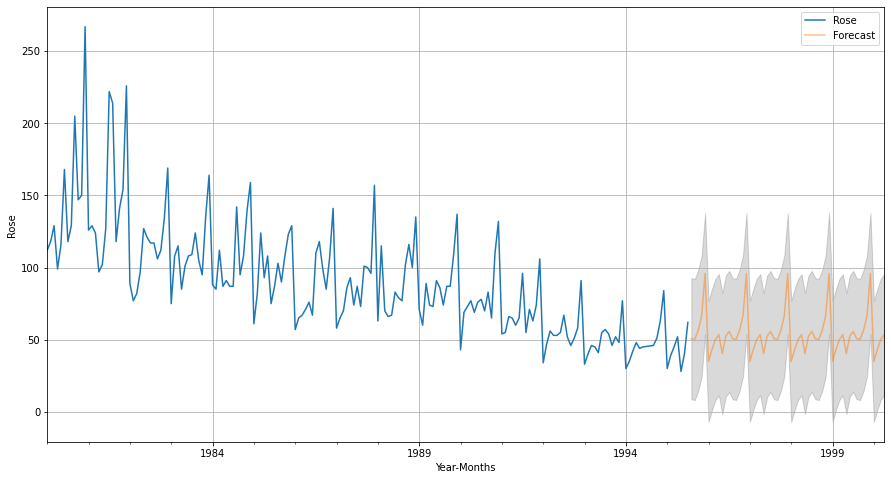

In [113]:
axis = data.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [115]:
fullmodel2 = ExponentialSmoothing(data,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=1.0,
                                                                 smoothing_seasonal=0.3)

In [116]:
RMSE_fullmodel2 = metrics.mean_squared_error(data['Rose'],fullmodel2.fittedvalues,squared=False)
print('RMSE:',RMSE_fullmodel2)

RMSE: 28.01563241707281


In [117]:
prediction_2 = fullmodel2.forecast(steps=12)

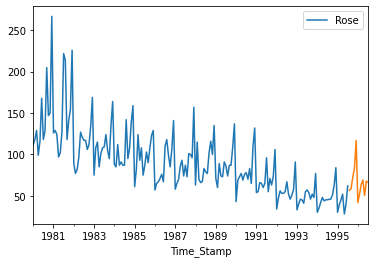

In [118]:
data.plot()
prediction_2.plot();

In [119]:
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,14.630412,56.609346,98.588279
1995-09-30,16.608219,58.587153,100.566086
1995-10-31,30.580447,72.559381,114.538314
1995-11-30,41.406658,83.385591,125.364524
1995-12-31,74.913876,116.892810,158.871743


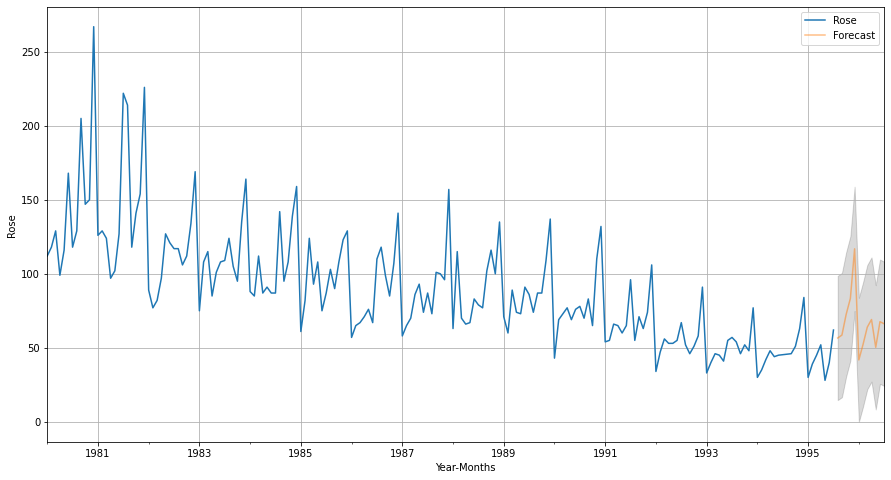

In [120]:
axis = data.plot(label='Actual', figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid()
plt.show()

In [121]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

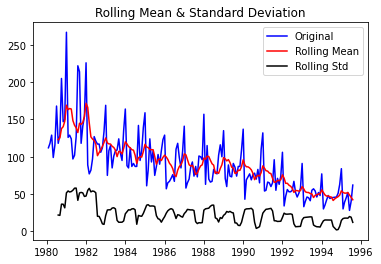

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [123]:
test_stationarity(data['Rose'])

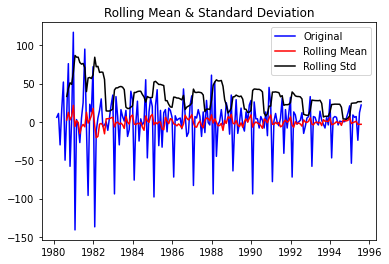

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [124]:
test_stationarity(data['Rose'].diff().dropna())

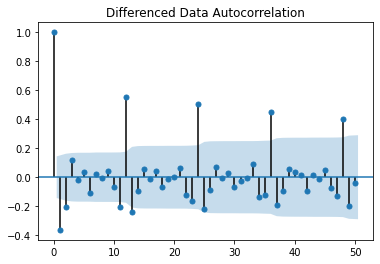

In [125]:
plot_acf(data['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

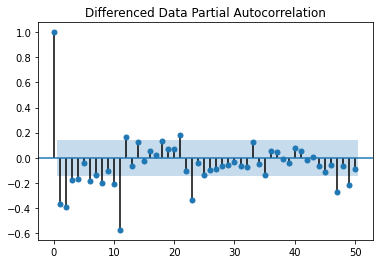

In [126]:
plot_pacf(data['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [127]:
p=q=range(0, 3)
d=range(1,2)
pdq=list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [128]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [129]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1315.1645929217334
ARIMA(0, 1, 1) - AIC:1258.039048575531
ARIMA(0, 1, 2) - AIC:1254.786677530965
ARIMA(1, 1, 0) - AIC:1299.0560243200116
ARIMA(1, 1, 1) - AIC:1255.6046151581302
ARIMA(1, 1, 2) - AIC:1255.2709084666585
ARIMA(2, 1, 0) - AIC:1280.0806971753402
ARIMA(2, 1, 1) - AIC:1256.862594546858
ARIMA(2, 1, 2) - AIC:1257.2401826353614


In [130]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1254.786678
5,"(1, 1, 2)",1255.270908
4,"(1, 1, 1)",1255.604615
7,"(2, 1, 1)",1256.862595
8,"(2, 1, 2)",1257.240183
1,"(0, 1, 1)",1258.039049
6,"(2, 1, 0)",1280.080697
3,"(1, 1, 0)",1299.056024
0,"(0, 1, 0)",1315.164593


In [131]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,1),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  129
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -623.431
Method:                       css-mle   S.D. of innovations             29.839
Date:                Fri, 02 Jul 2021   AIC                           1256.863
Time:                        06:31:10   BIC                           1271.162
Sample:                    02-29-1980   HQIC                          1262.673
                         - 10-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5291      0.079     -6.673      0.000      -0.685      -0.374
ar.L1.D.Rose     0.1971      0.088      2.240      0.027       0.025       0.369
ar.L2.D.Rose    -0.0758      0.088     -0.86

In [132]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [133]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

17.43687453180772


In [134]:
resultsDf=pd.DataFrame({'RMSE': [rmse]},index=['ARIMA(2,1,1)'])
resultsDf

,RMSE
"ARIMA(2,1,1)",17.436875


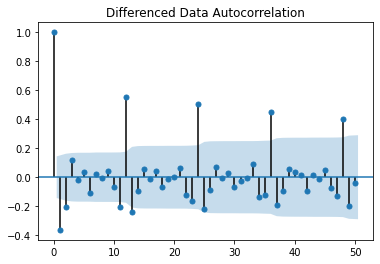

In [135]:
plot_acf(data['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [136]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [137]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [138]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1303.984314159292
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1244.5249278612168
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1126.3683185119546
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1254.8330900427961
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1222.394076027641
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1127.9704351774474
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1119.4509980817634
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1118.5483845606855
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1097.5754548012158
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1242.57660567999
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1180.3073662781226
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1078.897521686149
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1201.5870520845547
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1140.8703497182335
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1065.6063916862483
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1077.9454971659284
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1078.6925516950903
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1035.037044120074
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC

In [139]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 6)",1025.823325
80,"(2, 1, 2)","(2, 0, 2, 6)",1029.198823
53,"(1, 1, 2)","(2, 0, 2, 6)",1031.313972
71,"(2, 1, 1)","(2, 0, 2, 6)",1034.131058
44,"(1, 1, 1)","(2, 0, 2, 6)",1034.920837


In [140]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  130
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -505.912
Date:                           Fri, 02 Jul 2021   AIC                           1025.823
Time:                                   06:32:32   BIC                           1044.977
Sample:                                        0   HQIC                          1033.597
                                           - 130                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7887    652.856     -0.001      0.999   -1280.364    1278.786
ma.L2         -0.2113    137.890     -0.002

In [141]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [142]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,85.176012,19.135821,47.670491,122.681532
1,109.402253,19.605757,70.975675,147.828831
2,66.211885,19.605759,27.785304,104.638466
3,67.805730,19.607598,29.375545,106.235915
4,75.481847,19.599286,37.067951,113.895742


In [143]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

25.766527487015352


In [144]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA(2,1,1)",17.436875
"SARIMA(0,1,2)(2,0,2,6)",25.766527


In [146]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [147]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [148]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1303.984314159292
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1127.032318512197
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:956.4131665692057
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1121.3977282304234
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1097.1665795246627
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:950.6998497228394
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:941.29465127033
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:943.2558966541943
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:936.3148887533193
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1242.57660567999
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1079.9832204946456
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:904.3132399734129
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1078.2285176554656
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1035.724151027839
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:901.6481142950536
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:897.5837355743888
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:898.6607999294804
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:884.3850768411658
SARIMA(0, 1, 2)x(0, 0, 0, 1

In [149]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",871.075238
53,"(1, 1, 2)","(2, 0, 2, 12)",873.003875
80,"(2, 1, 2)","(2, 0, 2, 12)",874.213962
69,"(2, 1, 1)","(2, 0, 0, 12)",879.792363
78,"(2, 1, 2)","(2, 0, 0, 12)",880.763857


In [150]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  130
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -428.502
Date:                            Fri, 02 Jul 2021   AIC                            873.004
Time:                                    06:35:13   BIC                            894.004
Sample:                                         0   HQIC                           881.507
                                            - 130                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1002      0.350      0.286      0.775      -0.587       0.787
ma.L1         -0.9391    484.578   

In [151]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [152]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,91.010006,15.904143,59.838457,122.181554
1,114.697036,16.134059,83.074861,146.319211
2,60.835502,16.138989,29.203665,92.467339
3,70.598439,16.139302,38.965988,102.230891
4,76.889513,16.139329,45.257010,108.522017


In [153]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

25.420875744123347


In [154]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]},index=['SARIMA(1,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

,RMSE
"ARIMA(2,1,1)",17.436875
"SARIMA(0,1,2)(2,0,2,6)",25.766527
"SARIMA(1,1,2)(2,0,2,12)",25.420876


In [156]:
full_data_model = sm.tsa.statespace.SARIMAX(data['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -734.147
Date:                           Fri, 02 Jul 2021   AIC                           1482.294
Time:                                   06:35:49   BIC                           1504.286
Sample:                               01-31-1980   HQIC                          1491.218
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7297      0.070    -10.350      0.000      -0.868      -0.592
ma.L2         -0.1899      0.066     -2.883

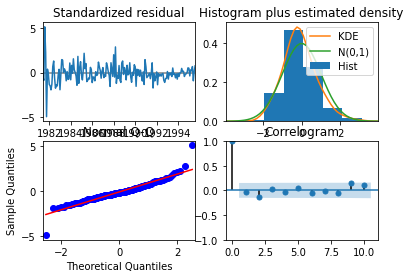

In [157]:
results_full_data_model.plot_diagnostics();

In [158]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [159]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05)

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,51.906635,16.960539,18.664588,85.148681
1995-09-30,48.560882,17.562344,14.139321,82.982443
1995-10-31,51.876503,17.615197,17.351352,86.401654
1995-11-30,52.523982,17.667892,17.895550,87.152413
1995-12-31,70.922129,17.720430,36.190724,105.653533
1996-01-31,35.608491,17.772813,0.774418,70.442564
1996-02-29,36.103892,18.066583,0.694041,71.513744
1996-03-31,40.520377,18.159129,4.929139,76.111616
1996-04-30,40.337886,18.222257,4.622919,76.052853
1996-05-31,38.152511,18.285167,2.314243,73.990780


In [160]:
rmse = mean_squared_error(data['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.050812588685464


In [161]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='2015-08-31',end='2016-07-31', freq='M'))

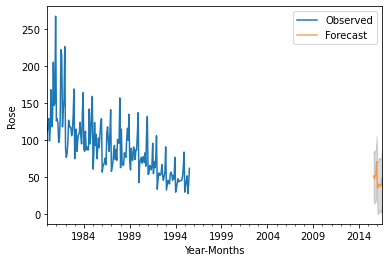

In [162]:
axis = data['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()